In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from glob import glob
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from re import findall as find

In [ ]:
#code to import data from csv files and make a 3d dataframe with the values from "Area" "Mean" "Time" "Position"
#the data is from the csv files in the folder "H:\PHD_data\Imaging_et_analysis\Sp8Imaging\2021\04-Apr\08042021_celltrackCnt\*\AreaAnalysisFigure1\"
def get_Data(folder):
    for file in glob(folder):
        df = pd.read_csv(file)
        df = df.drop(columns=['Unnamed: 0'])
        df = df.drop(columns=['Unnamed: 0.1'])
        df = df.drop(columns=['Unnamed: 0.1.1'])
        df = df.drop(columns=['Unnamed:

In [40]:
from re import findall as find
megaData=pd.DataFrame()
for file in glob( r"H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2021\\04-Apr\\08042021_celltrackCnt\\*\\AreaAnalysisFigure1\\*.csv"):
    datatemp = pd.read_csv(file)
    data=pd.DataFrame()
    data['Area'] = datatemp['Area']
    data['Mean'] = datatemp['Mean']
    data["Position"]=file.split("\\")[-3]
    data["Time"]=(int(find(r"\d+",file)[-1]))*5.1/60+4.5
    megaData = pd.concat([megaData,data])
megaData.to_csv(r"H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2021\\04-Apr\\08042021_celltrackCnt\\AreaIntensityTimeData.csv",sep="\t")

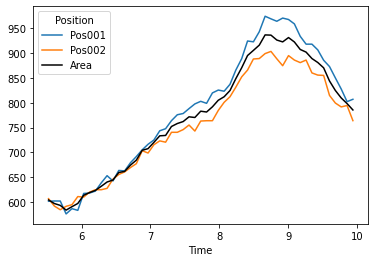

In [45]:
# group the data by Position and Time, and calculate the mean of the Area for each group
mean_data = megaData.groupby(['Position', 'Time'])['Area'].mean().reset_index()

# group the data by Time, and calculate the mean of the Area for each group
mean_data_avg = mean_data.groupby(['Time'])['Area'].mean().reset_index()

# plot the mean of the Area with time as x axis for both positions and the average of the two
mean_data.pivot(index='Time', columns='Position', values='Area').plot()
mean_data_avg.plot(x='Time', y='Area', kind='line', color='black', ax=plt.gca())
plt.show()


In [ ]:
mega_data.groupby(["Time"])["Area","Mean"].,mean()

,Position,Time,Area
0,Pos001,5.520,601.222213
1,Pos001,5.605,601.776026
2,Pos001,5.690,601.713994
3,Pos001,5.775,575.724161
4,Pos001,5.860,586.303807
...,...,...,...
101,Pos002,9.600,814.750480
102,Pos002,9.685,799.364374
103,Pos002,9.770,791.511328
104,Pos002,9.855,794.359097
